<h1><b>Predicting Heartfailure (WIP)</b></h1>
<h4>Seth Thor</h4>

Dataset provided by: <br>
Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020).
<br>
<br>
<b>Parameters</b> <br>
Age: 30 - 100 <br>
Anemia: Decrease of red blood cells or hemoglobin (1 = has anemia, 0 = doesn't have anemia) <br>
creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L) <br>
diabetes: If the patient has diabetes (1 = has, 0 = doesn't have) <br>
ejection_fraction: Volumetric percentage of blood leaving the heart at each contraction (percentage) <br>
high_blood_pressure: If the patient has hypertension (1 = has, 0 = doesn't have) <br>
platelets: Platelets in the blood (kiloplatelets/mL) <br>
serum_creatinine: Level of serum creatinine in the blood (mg/dL) <br>
serum_sodium: Level of serum sodium in the blood (mEq/L) <br>
sex: 1 = male, 0 = female

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [37]:
dataset = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [38]:
# Gender: 1 = male, 0 = female
# Anaemia: 1 = has, 0 = does not have
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [39]:
# Time column is number of days until death (1) or censoring (2)
# For now, we will omit the time column from the rough-draft analysis
X = dataset.iloc[:, 0:11]
y = dataset["DEATH_EVENT"]


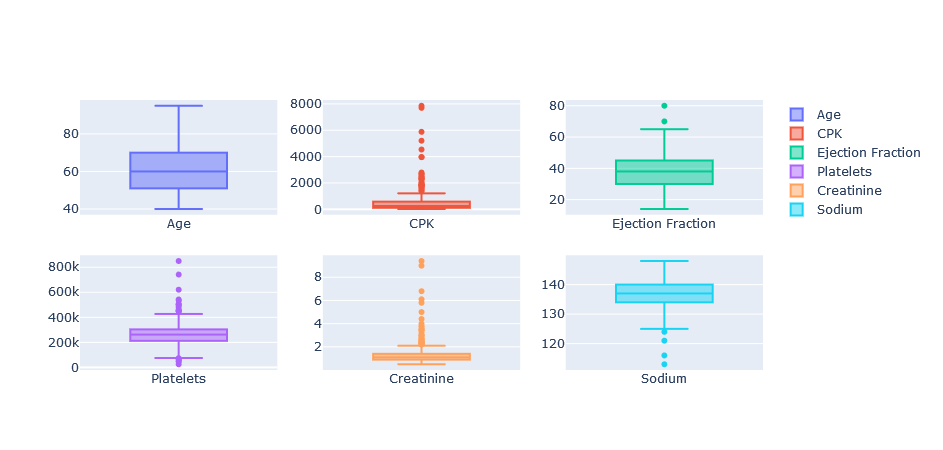

In [50]:
# Check for outliers: age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium
fig = make_subplots(
    #subplot_titles("Age", "CPK", "Ejection Fraction", "Platelets", "Creatinine", "Sodium"),
    rows=2, 
    cols=3 )

fig.add_trace(
    go.Box(y=X["age"], name="Age"),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=X["creatinine_phosphokinase"], name="CPK"),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=X["ejection_fraction"], name="Ejection Fraction"),
    row=1, col=3
)

fig.add_trace(
    go.Box(y=X["platelets"], name="Platelets"),
    row=2, col=1
)

fig.add_trace(
    go.Box(y=X["serum_creatinine"], name="Creatinine"),
    row=2, col=2
)

fig.add_trace(
    go.Box(y=X["serum_sodium"], name="Sodium"),
    row=2, col=3
)



In [53]:
# Explore the data
# Distribution of parameter values when either died or lived
#fig = px.histogram(X, x="age", color="sex", title="Age Distribution By Gender")
#fig.show()

lived = dataset.loc[dataset["DEATH_EVENT"] == 1]
died = dataset.loc[dataset["DEATH_EVENT"] == 0]

By Age

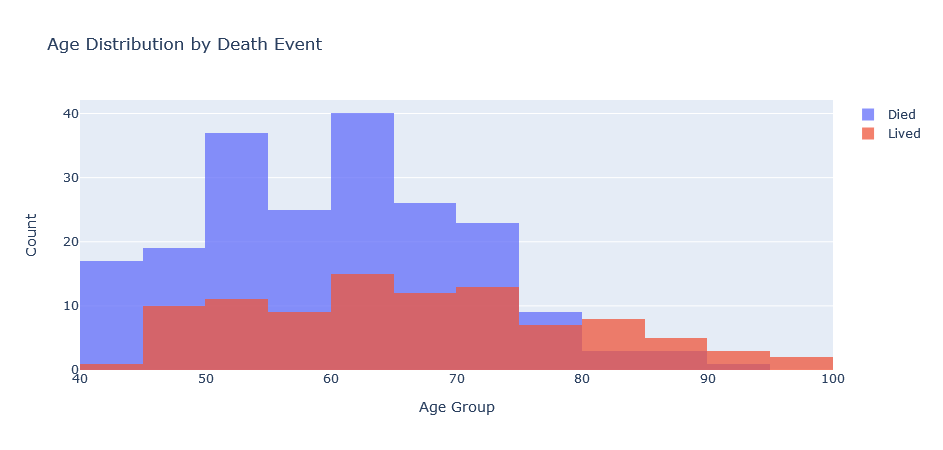

In [58]:
fig = go.Figure()

fig.add_trace( go.Histogram(
    x=died["age"], 
    name="Died",
    xbins=dict(
        start = 30,
        end = 100,
        size = 5
    )
) )

fig.add_trace( go.Histogram(
    x=lived["age"],
    name="Lived",
    xbins=dict(
        start = 30,
        end = 100,
        size = 5
    )
) )



fig.update_layout(
    title="Age Distribution by Death Event",
    xaxis_title="Age Group",
    yaxis_title="Count",
    barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()


By CPK

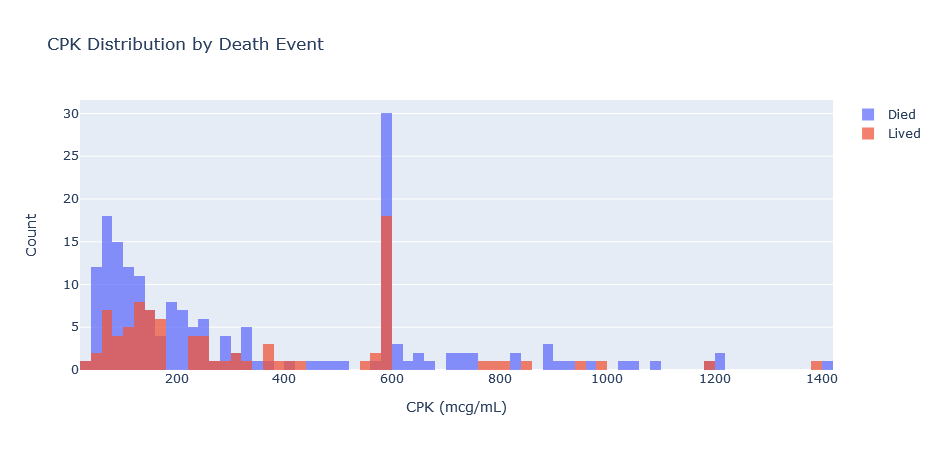

In [62]:

fig = go.Figure()

fig.add_trace( go.Histogram(
    x=died["creatinine_phosphokinase"], 
    name="Died",
    xbins=dict(
        start = 0,
        end = 1500,
        size = 20
    )
) )

fig.add_trace( go.Histogram(
    x=lived["creatinine_phosphokinase"],
    name="Lived",
    xbins=dict(
        start = 0,
        end = 1500,
        size = 20
    )
) )



fig.update_layout(
    title="CPK Distribution by Death Event",
    xaxis_title="CPK (mcg/mL)",
    yaxis_title="Count",
    barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

By Ejection Fraction

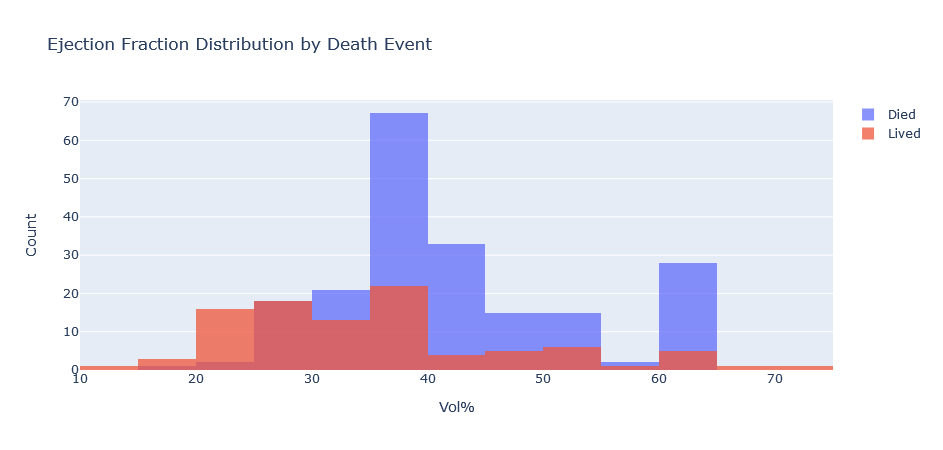

In [69]:
fig = go.Figure()

fig.add_trace( go.Histogram(
    x=died["ejection_fraction"], 
    name="Died",
    xbins=dict(
        start = 0,
        end = 80,
        size = 5
    )
) )

fig.add_trace( go.Histogram(
    x=lived["ejection_fraction"],
    name="Lived",
    xbins=dict(
        start = 0,
        end = 80,
        size = 5
    )
) )



fig.update_layout(
    title="Ejection Fraction Distribution by Death Event",
    xaxis_title="Vol%",
    yaxis_title="Count",
    barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

By Platelets

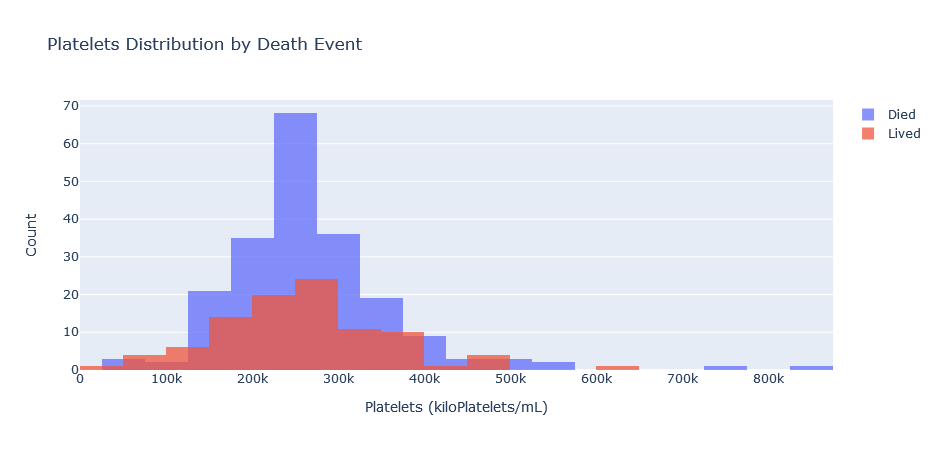

In [71]:
fig = go.Figure()

fig.add_trace( go.Histogram(
    x=died["platelets"], 
    name="Died"
) )

fig.add_trace( go.Histogram(
    x=lived["platelets"],
    name="Lived"
) )



fig.update_layout(
    title="Platelets Distribution by Death Event",
    xaxis_title="Platelets (kiloPlatelets/mL)",
    yaxis_title="Count",
    barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

By Creatinine

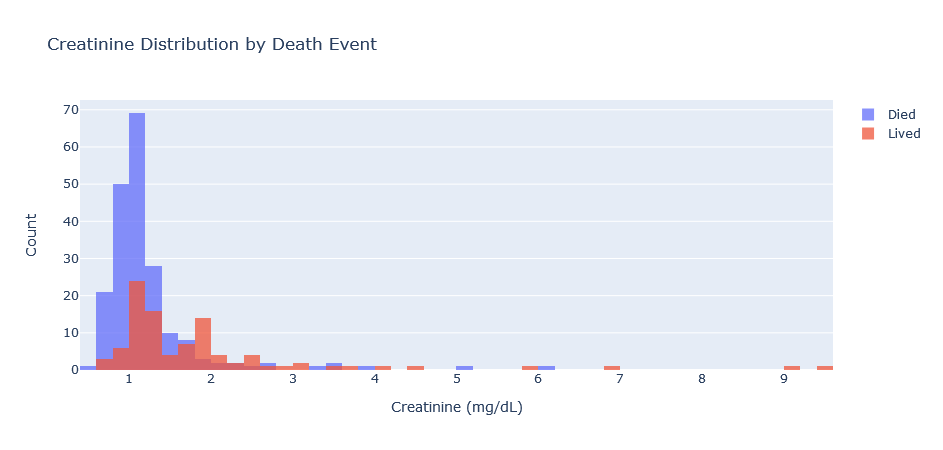

In [74]:
fig = go.Figure()

fig.add_trace( go.Histogram(
    x=died["serum_creatinine"], 
    name="Died",
    xbins=dict(
        start = 0,
        end = 10,
        size = 0.2
    )
) )

fig.add_trace( go.Histogram(
    x=lived["serum_creatinine"],
    name="Lived",
    xbins=dict(
        start = 0,
        end = 10,
        size = 0.2
    )
) )



fig.update_layout(
    title="Creatinine Distribution by Death Event",
    xaxis_title="Creatinine (mg/dL)",
    yaxis_title="Count",
    barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

By Sodium

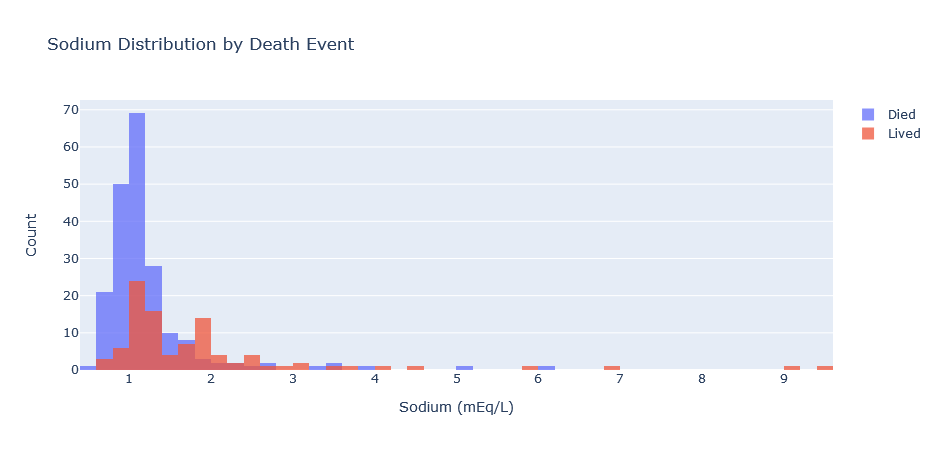

In [79]:
# By sodium
fig = go.Figure()

fig.add_trace( go.Histogram(
    x=died["serum_creatinine"], 
    name="Died",
    xbins=dict(
        start = 0,
        end = 10,
        size = 0.2
    )
) )

fig.add_trace( go.Histogram(
    x=lived["serum_creatinine"],
    name="Lived",
    xbins=dict(
        start = 0,
        end = 10,
        size = 0.2
    )

) )



fig.update_layout(
    title="Sodium Distribution by Death Event",
    xaxis_title="Sodium (mEq/L)",
    yaxis_title="Count",
    barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

<h2>Logistic Regression for Predictive Model</h2>

In [81]:
# Rescale columns based on min and max. Only need to rescale columns 0, 2, 4, 6, 8
mm_scaler = preprocessing.MinMaxScaler()
X[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_sodium"]] = mm_scaler.fit_transform(X[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_sodium"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [82]:
# Apply Logistic regression on training dataset
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\Seth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [83]:
# Use fitted model to predict classification based on test set
y_predicted = clf.predict(X_test)

In [84]:
# Get the confusion matrix
cf_results = metrics.confusion_matrix(y_test, y_predicted)
print(cf_results)

[[52  4]
 [22 12]]


In [85]:
# Check accuracy of predictions
accuracy = metrics.accuracy_score(y_test, y_predicted)
print(accuracy)

0.7111111111111111
